In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Day 1

In [2]:
df = pd.read_csv('aoc_day1.csv', header=None)
df

,0
0,7jlncfksix7rjgrpglmn9
1,vcgkgxninerqjltdbhqzzpd4nine23
2,fx3
3,8nrbjbpjpnineseven
4,7qlfhcsnxn7fpfhjcgr6eightsevenjlpchjtzpztwo
...,...
995,54rvpqphbpxmcfjmcspsnhrjp
996,eightn2skzmpmtgqhvvfxgqonevtbfsmfklzspxdrgj
997,nine276rzshsrvncjrdzfxbmzzlvkhdlcc
998,sevenfivexgznfftgthree44


In [3]:
# init list to catch calibration values
calibration_values = []

# loop through each row and convert the line into a list of string values with each element in the list being its own string
for j in df[0]:
    single_list = [j[i:i+1] for i in range(0, len(j), 1)]
    digit_list = []
    # loop through the list we created above and transform each element into a integer and append it to a new list; the try/except statement will ensure we only capture digits and no letters
    for k in single_list:
        try:
            digit_list.append(int(k))
        except ValueError:
            pass
    calibration_values.append(str(digit_list[0])+str(digit_list[-1]))
# convert each calibration value into integers and sum them 
sum([eval(i) for i in calibration_values])

55488

### Part 2

In [4]:
# init list to catch calibration values
calibration_values = []

# create function that inserts the digit form into the string version of each number so we can call this and run the same loop from from part 1
def digit_conversion(string):
    digit_map = {'one': 'o1e', 'two': 't2o', 'three': 't3e', 'four': 'f4r', 'five': 'f5e', 'six': 's6x', 'seven': 's7n', 'eight': 'e8t', 'nine': 'n9e'}
    for word, digit in digit_map.items():
        string = string.replace(word, digit)
    return string

# loop through each row and convert the line into a list of string values with each element in the list being its own string
for j in df[0]:
    j = digit_conversion(j)
    single_list = [j[i:i+1] for i in range(0, len(j), 1)]
    digit_list = []
    # loop through the list we created above and transform each element into a integer and append it to a new list; the try/except statement will ensure we only capture digits and no letters
    for k in single_list:
        try:
            digit_list.append(int(k))
        except ValueError:
            pass
    calibration_values.append(str(digit_list[0])+str(digit_list[-1]))
# convert each calibration value into integers and sum them 
sum([eval(i) for i in calibration_values])

55614

# Day 2

In [5]:
df = pd.read_csv('aoc_day2.csv', header=None, names=['sets'])
df

,sets
0,"Game 1: 1 green, 1 blue, 1 red; 1 green, 8 red..."
1,"Game 2: 9 red, 7 green, 3 blue; 15 green, 2 bl..."
2,"Game 3: 3 red, 1 blue, 4 green; 6 red, 3 green..."
3,"Game 4: 2 blue, 2 green, 19 red; 3 blue, 11 re..."
4,"Game 5: 8 green, 1 red, 12 blue; 10 green, 6 r..."
...,...
95,"Game 96: 2 red, 2 green, 1 blue; 1 red, 4 gree..."
96,"Game 97: 4 red, 5 green; 5 blue, 3 red; 8 blue..."
97,"Game 98: 1 blue; 2 green, 1 red; 5 red, 2 gree..."
98,"Game 99: 6 blue, 5 red, 2 green; 9 red, 1 blue..."


In [6]:
# adds a new column for the game number so we can add these up later
df['game'] = range(1, 101)
# removes the 'Game ##: ' part from the first set so we can calculate this column like the rest
df['sets'] = df['sets'].apply(lambda x: x.split(':', 1)[1] if ':' in x else x)
df

,sets,game
0,"1 green, 1 blue, 1 red; 1 green, 8 red, 7 blu...",1
1,"9 red, 7 green, 3 blue; 15 green, 2 blue, 5 r...",2
2,"3 red, 1 blue, 4 green; 6 red, 3 green, 2 blu...",3
3,"2 blue, 2 green, 19 red; 3 blue, 11 red, 16 g...",4
4,"8 green, 1 red, 12 blue; 10 green, 6 red, 13 ...",5
...,...,...
95,"2 red, 2 green, 1 blue; 1 red, 4 green; 1 green",96
96,"4 red, 5 green; 5 blue, 3 red; 8 blue, 2 gree...",97
97,"1 blue; 2 green, 1 red; 5 red, 2 green; 4 red...",98
98,"6 blue, 5 red, 2 green; 9 red, 1 blue; 2 gree...",99


In [7]:
import re

# declare maximum value for each color
max_red = 12
max_green = 13
max_blue = 14

# init list for whether max is exceeded or not
max_exceeded = []

# loop through each game
for color_set in df['sets']:
    # init boolean for declaring if that game is possible
    exceeded = False
    
    # regex statement for each color that extracts the number in front of that color and checks if any of these numbers exceed the max number, changing the boolean if they do
    r_matches = re.findall(r'(\d{1,2}) red', color_set)
    for num in r_matches:
        if int(num) > max_red:
            exceeded = True
    g_matches = re.findall(r'(\d{1,2}) green', color_set)
    for num in g_matches:
        if int(num) > max_green:
            exceeded = True
    b_matches = re.findall(r'(\d{1,2}) blue', color_set)
    for num in b_matches:
        if int(num) > max_blue:
            exceeded = True

    # append the boolean check for each game
    max_exceeded.append(exceeded)

# turns list into new column
df['max_exceeded'] = max_exceeded
df

,sets,game,max_exceeded
0,"1 green, 1 blue, 1 red; 1 green, 8 red, 7 blu...",1,False
1,"9 red, 7 green, 3 blue; 15 green, 2 blue, 5 r...",2,True
2,"3 red, 1 blue, 4 green; 6 red, 3 green, 2 blu...",3,True
3,"2 blue, 2 green, 19 red; 3 blue, 11 red, 16 g...",4,True
4,"8 green, 1 red, 12 blue; 10 green, 6 red, 13 ...",5,False
...,...,...,...
95,"2 red, 2 green, 1 blue; 1 red, 4 green; 1 green",96,False
96,"4 red, 5 green; 5 blue, 3 red; 8 blue, 2 gree...",97,False
97,"1 blue; 2 green, 1 red; 5 red, 2 green; 4 red...",98,False
98,"6 blue, 5 red, 2 green; 9 red, 1 blue; 2 gree...",99,False


In [8]:
# use a mask to filter out games that weren't possible
mask = df['max_exceeded'] == False
possible_games = df.loc[mask, 'game']
# add up the sum of the game IDs that were possible
sum(possible_games)

3035

### Part 2

In [9]:
# init power list
power_list = []

# loop through each game
for color_set in df['sets']:
    #init power value for each row
    power = 0
    
    # same regex statement to extract numbers but now I am just capturing the minimum value and calculating the power
    r_matches = re.findall(r'(\d{1,2}) red', color_set)
    r_matches = [eval(i) for i in r_matches]
    power = max(r_matches)
    g_matches = re.findall(r'(\d{1,2}) green', color_set)
    g_matches = [eval(i) for i in g_matches]
    power *= max(g_matches)
    b_matches = re.findall(r'(\d{1,2}) blue', color_set)
    b_matches = [eval(i) for i in b_matches]
    power *= max(b_matches)

    # append the power for each game
    power_list.append(power)

# sum the powers for each game
sum(power_list)

66027

# Day 3

In [10]:
#load in schematic
schematic = list(open('aoc_day3.txt'))

In [11]:
import re

# init symbols dict
symbols = {}
# loop over rows and columns to find the symbols and capture their x,y coordinate
for x in range(len(schematic)):
    for y in range(len(schematic[x].rstrip())):
        if schematic[x][y] not in '0123456789.':
            symbols[(x, y)] = []

# loop through rows and columns of schematic
for row_index, row in enumerate(schematic):
    for number_match in re.finditer(r'\d+', row):
        # capture the whole number
        number = int(number_match.group())

        # loop to create a 'filter' like what we use for CNNs that captures the box around the number
        adjacent_cells_window = set()
        for adj_row in (row_index - 1, row_index, row_index + 1):
            for adj_col in range(number_match.start() - 1, number_match.end() + 1):
                adjacent_cells_window.add((adj_row, adj_col))

        # if a symbol from our dict is captured in the filter then append that number to the list
        for cell in adjacent_cells_window & symbols.keys():
            symbols[cell].append(number)

# sum all the numbers in the symbols dict and then sum up all of these sums to get the total of the part numbers
total_part_numbers = sum(sum(numbers_list) for numbers_list in symbols.values())
total_part_numbers

517021

### Part 2

In [12]:
import math

# init symbols dict
symbols = {}

# adjusts this from the code above to just view '*' as the only symbol
symbols = {}
for x in range(len(schematic)):
    for y in range(len(schematic[x].rstrip())):
        if schematic[x][y] == '*':
            symbols[(x, y)] = []

# loop through rows and columns of schematic
for row_index, row in enumerate(schematic):
    for number_match in re.finditer(r'\d+', row):
        # capture the whole number
        number = int(number_match.group())

        # loop to create a 'filter' like what we use for CNNs that captures the box around the number
        adjacent_cells_window = set()
        for adj_row in (row_index - 1, row_index, row_index + 1):
            for adj_col in range(number_match.start() - 1, number_match.end() + 1):
                adjacent_cells_window.add((adj_row, adj_col))

        # if a symbol from our dict is captured in the filter then append that number to the list
        for cell in adjacent_cells_window & symbols.keys():
            symbols[cell].append(number)

# find the gears with exactly two numbers in the dict; multiply these together and then add up all these gear ratios to get the total
total_gear_ratios = sum(math.prod(gear) for gear in symbols.values() if len(gear) == 2)
total_gear_ratios

81296995

# Day 4

In [13]:
df = pd.read_csv('aoc_day4.csv', header=None, names=['cards'])
df

,cards
0,Card 1: 20 72 30 38 18 65 6 55 70 27 | 12 2...
1,Card 2: 15 98 12 3 20 60 58 54 34 18 | 98 2...
2,Card 3: 47 97 2 80 89 56 66 85 62 46 | 78 9...
3,Card 4: 60 59 88 14 53 46 96 29 99 37 | 52 4...
4,Card 5: 44 46 42 9 65 98 97 67 72 22 | 80 1...
...,...
182,Card 183: 58 73 31 77 33 10 49 92 28 25 | 39 ...
183,Card 184: 10 41 56 32 84 29 85 26 34 27 | 6 ...
184,Card 185: 95 13 15 61 49 19 60 21 33 87 | 30 3...
185,Card 186: 41 48 94 68 60 15 22 55 84 2 | 57 5...


In [14]:
# remove the card number info
df['cards'] = df['cards'].apply(lambda x: x.split(':', 1)[1] if ':' in x else x)
# split the cards into separate columns for the winning numbers and the numbers on our card
df[['winning_numbers', 'our_numbers']] = df['cards'].str.split('|', expand=True)
df

,cards,winning_numbers,our_numbers
0,20 72 30 38 18 65 6 55 70 27 | 12 28 47 50 6...,20 72 30 38 18 65 6 55 70 27,12 28 47 50 60 17 14 25 41 95 66 88 61 52 76 ...
1,15 98 12 3 20 60 58 54 34 18 | 98 23 12 19 6...,15 98 12 3 20 60 58 54 34 18,98 23 12 19 61 38 11 43 58 97 63 10 49 67 44 ...
2,47 97 2 80 89 56 66 85 62 46 | 78 97 47 14 1...,47 97 2 80 89 56 66 85 62 46,78 97 47 14 15 85 42 66 24 28 54 46 89 62 80 ...
3,60 59 88 14 53 46 96 29 99 37 | 52 46 92 26 7...,60 59 88 14 53 46 96 29 99 37,52 46 92 26 72 74 99 38 7 65 43 63 39 36 44 ...
4,44 46 42 9 65 98 97 67 72 22 | 80 14 29 39 9...,44 46 42 9 65 98 97 67 72 22,80 14 29 39 98 64 9 46 52 24 69 22 51 65 66 ...
...,...,...,...
182,58 73 31 77 33 10 49 92 28 25 | 39 3 96 41 4...,58 73 31 77 33 10 49 92 28 25,39 3 96 41 45 32 82 79 8 21 36 9 6 17 84 ...
183,10 41 56 32 84 29 85 26 34 27 | 6 4 9 38 2...,10 41 56 32 84 29 85 26 34 27,6 4 9 38 25 26 8 86 68 87 11 30 5 79 78 ...
184,95 13 15 61 49 19 60 21 33 87 | 30 36 52 88 2...,95 13 15 61 49 19 60 21 33 87,30 36 52 88 23 65 95 25 53 51 77 32 66 31 68 ...
185,41 48 94 68 60 15 22 55 84 2 | 57 53 9 50 ...,41 48 94 68 60 15 22 55 84 2,57 53 9 50 4 16 11 62 61 6 46 52 8 35 23 ...


In [15]:
# function to convert the list values for a column into integers; used for the finding the matches in the next step
def convert_to_int(column):
    return [int(x) for x in column.strip().split()]

# apply this function to the winning numbers and our numbers columns
df['winning_numbers'] = df['winning_numbers'].apply(convert_to_int)
df['our_numbers'] = df['our_numbers'].apply(convert_to_int)
df

,cards,winning_numbers,our_numbers
0,20 72 30 38 18 65 6 55 70 27 | 12 28 47 50 6...,"[20, 72, 30, 38, 18, 65, 6, 55, 70, 27]","[12, 28, 47, 50, 60, 17, 14, 25, 41, 95, 66, 8..."
1,15 98 12 3 20 60 58 54 34 18 | 98 23 12 19 6...,"[15, 98, 12, 3, 20, 60, 58, 54, 34, 18]","[98, 23, 12, 19, 61, 38, 11, 43, 58, 97, 63, 1..."
2,47 97 2 80 89 56 66 85 62 46 | 78 97 47 14 1...,"[47, 97, 2, 80, 89, 56, 66, 85, 62, 46]","[78, 97, 47, 14, 15, 85, 42, 66, 24, 28, 54, 4..."
3,60 59 88 14 53 46 96 29 99 37 | 52 46 92 26 7...,"[60, 59, 88, 14, 53, 46, 96, 29, 99, 37]","[52, 46, 92, 26, 72, 74, 99, 38, 7, 65, 43, 63..."
4,44 46 42 9 65 98 97 67 72 22 | 80 14 29 39 9...,"[44, 46, 42, 9, 65, 98, 97, 67, 72, 22]","[80, 14, 29, 39, 98, 64, 9, 46, 52, 24, 69, 22..."
...,...,...,...
182,58 73 31 77 33 10 49 92 28 25 | 39 3 96 41 4...,"[58, 73, 31, 77, 33, 10, 49, 92, 28, 25]","[39, 3, 96, 41, 45, 32, 82, 79, 8, 21, 36, 9, ..."
183,10 41 56 32 84 29 85 26 34 27 | 6 4 9 38 2...,"[10, 41, 56, 32, 84, 29, 85, 26, 34, 27]","[6, 4, 9, 38, 25, 26, 8, 86, 68, 87, 11, 30, 5..."
184,95 13 15 61 49 19 60 21 33 87 | 30 36 52 88 2...,"[95, 13, 15, 61, 49, 19, 60, 21, 33, 87]","[30, 36, 52, 88, 23, 65, 95, 25, 53, 51, 77, 3..."
185,41 48 94 68 60 15 22 55 84 2 | 57 53 9 50 ...,"[41, 48, 94, 68, 60, 15, 22, 55, 84, 2]","[57, 53, 9, 50, 4, 16, 11, 62, 61, 6, 46, 52, ..."


In [16]:
# init matches list
matches = []
# loop through both numbers columns using the set feature to find matches and then append those to a list
for i, j in zip(df['winning_numbers'], df['our_numbers']):
    if set(i) & set(j):
        matches.append(list(set(i) & set(j)))
    else:
        matches.append([0])
# convert the matches into a new column
df['matches'] = matches
df

,cards,winning_numbers,our_numbers,matches
0,20 72 30 38 18 65 6 55 70 27 | 12 28 47 50 6...,"[20, 72, 30, 38, 18, 65, 6, 55, 70, 27]","[12, 28, 47, 50, 60, 17, 14, 25, 41, 95, 66, 8...",[0]
1,15 98 12 3 20 60 58 54 34 18 | 98 23 12 19 6...,"[15, 98, 12, 3, 20, 60, 58, 54, 34, 18]","[98, 23, 12, 19, 61, 38, 11, 43, 58, 97, 63, 1...","[98, 58, 12, 20]"
2,47 97 2 80 89 56 66 85 62 46 | 78 97 47 14 1...,"[47, 97, 2, 80, 89, 56, 66, 85, 62, 46]","[78, 97, 47, 14, 15, 85, 42, 66, 24, 28, 54, 4...","[97, 2, 66, 46, 47, 80, 85, 56, 89, 62]"
3,60 59 88 14 53 46 96 29 99 37 | 52 46 92 26 7...,"[60, 59, 88, 14, 53, 46, 96, 29, 99, 37]","[52, 46, 92, 26, 72, 74, 99, 38, 7, 65, 43, 63...","[99, 46]"
4,44 46 42 9 65 98 97 67 72 22 | 80 14 29 39 9...,"[44, 46, 42, 9, 65, 98, 97, 67, 72, 22]","[80, 14, 29, 39, 98, 64, 9, 46, 52, 24, 69, 22...","[65, 98, 67, 97, 72, 9, 42, 44, 46, 22]"
...,...,...,...,...
182,58 73 31 77 33 10 49 92 28 25 | 39 3 96 41 4...,"[58, 73, 31, 77, 33, 10, 49, 92, 28, 25]","[39, 3, 96, 41, 45, 32, 82, 79, 8, 21, 36, 9, ...",[0]
183,10 41 56 32 84 29 85 26 34 27 | 6 4 9 38 2...,"[10, 41, 56, 32, 84, 29, 85, 26, 34, 27]","[6, 4, 9, 38, 25, 26, 8, 86, 68, 87, 11, 30, 5...",[26]
184,95 13 15 61 49 19 60 21 33 87 | 30 36 52 88 2...,"[95, 13, 15, 61, 49, 19, 60, 21, 33, 87]","[30, 36, 52, 88, 23, 65, 95, 25, 53, 51, 77, 3...",[95]
185,41 48 94 68 60 15 22 55 84 2 | 57 53 9 50 ...,"[41, 48, 94, 68, 60, 15, 22, 55, 84, 2]","[57, 53, 9, 50, 4, 16, 11, 62, 61, 6, 46, 52, ...",[22]


In [17]:
# convert the games with no matches to NaN and then drop these rows
df['matches'] = df['matches'].apply(lambda x: np.nan if x == [0] else x)
df2 = df.copy() # create copy for part 2
df.dropna(inplace=True)
df

,cards,winning_numbers,our_numbers,matches
1,15 98 12 3 20 60 58 54 34 18 | 98 23 12 19 6...,"[15, 98, 12, 3, 20, 60, 58, 54, 34, 18]","[98, 23, 12, 19, 61, 38, 11, 43, 58, 97, 63, 1...","[98, 58, 12, 20]"
2,47 97 2 80 89 56 66 85 62 46 | 78 97 47 14 1...,"[47, 97, 2, 80, 89, 56, 66, 85, 62, 46]","[78, 97, 47, 14, 15, 85, 42, 66, 24, 28, 54, 4...","[97, 2, 66, 46, 47, 80, 85, 56, 89, 62]"
3,60 59 88 14 53 46 96 29 99 37 | 52 46 92 26 7...,"[60, 59, 88, 14, 53, 46, 96, 29, 99, 37]","[52, 46, 92, 26, 72, 74, 99, 38, 7, 65, 43, 63...","[99, 46]"
4,44 46 42 9 65 98 97 67 72 22 | 80 14 29 39 9...,"[44, 46, 42, 9, 65, 98, 97, 67, 72, 22]","[80, 14, 29, 39, 98, 64, 9, 46, 52, 24, 69, 22...","[65, 98, 67, 97, 72, 9, 42, 44, 46, 22]"
5,53 92 3 77 46 68 11 23 81 88 | 42 3 92 4 2...,"[53, 92, 3, 77, 46, 68, 11, 23, 81, 88]","[42, 3, 92, 4, 23, 43, 62, 81, 51, 1, 29, 88, ...","[3, 68, 11, 77, 46, 81, 53, 23, 88, 92]"
...,...,...,...,...
180,58 60 47 94 81 55 51 3 72 19 | 10 42 23 1 1...,"[58, 60, 47, 94, 81, 55, 51, 3, 72, 19]","[10, 42, 23, 1, 18, 21, 82, 16, 96, 45, 31, 57...",[60]
181,53 98 12 49 5 26 90 64 71 92 | 25 81 61 46 6...,"[53, 98, 12, 49, 5, 26, 90, 64, 71, 92]","[25, 81, 61, 46, 62, 6, 70, 91, 27, 30, 52, 21...",[49]
183,10 41 56 32 84 29 85 26 34 27 | 6 4 9 38 2...,"[10, 41, 56, 32, 84, 29, 85, 26, 34, 27]","[6, 4, 9, 38, 25, 26, 8, 86, 68, 87, 11, 30, 5...",[26]
184,95 13 15 61 49 19 60 21 33 87 | 30 36 52 88 2...,"[95, 13, 15, 61, 49, 19, 60, 21, 33, 87]","[30, 36, 52, 88, 23, 65, 95, 25, 53, 51, 77, 3...",[95]


In [18]:
# capture the amount of matches
df['count'] = df['matches'].apply(lambda x: len(x))
# calc the score for each row
df['score'] = df['count'].apply(lambda x: 2**(x-1))
# sum the scores for each game
sum(df['score'])

22674

### Part 2

In [19]:
# use the copy created above and re-add the count column, but now to adjust for the NaN values
df2['count'] = df2['matches'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df2

,cards,winning_numbers,our_numbers,matches,count
0,20 72 30 38 18 65 6 55 70 27 | 12 28 47 50 6...,"[20, 72, 30, 38, 18, 65, 6, 55, 70, 27]","[12, 28, 47, 50, 60, 17, 14, 25, 41, 95, 66, 8...",NaN,0
1,15 98 12 3 20 60 58 54 34 18 | 98 23 12 19 6...,"[15, 98, 12, 3, 20, 60, 58, 54, 34, 18]","[98, 23, 12, 19, 61, 38, 11, 43, 58, 97, 63, 1...","[98, 58, 12, 20]",4
2,47 97 2 80 89 56 66 85 62 46 | 78 97 47 14 1...,"[47, 97, 2, 80, 89, 56, 66, 85, 62, 46]","[78, 97, 47, 14, 15, 85, 42, 66, 24, 28, 54, 4...","[97, 2, 66, 46, 47, 80, 85, 56, 89, 62]",10
3,60 59 88 14 53 46 96 29 99 37 | 52 46 92 26 7...,"[60, 59, 88, 14, 53, 46, 96, 29, 99, 37]","[52, 46, 92, 26, 72, 74, 99, 38, 7, 65, 43, 63...","[99, 46]",2
4,44 46 42 9 65 98 97 67 72 22 | 80 14 29 39 9...,"[44, 46, 42, 9, 65, 98, 97, 67, 72, 22]","[80, 14, 29, 39, 98, 64, 9, 46, 52, 24, 69, 22...","[65, 98, 67, 97, 72, 9, 42, 44, 46, 22]",10
...,...,...,...,...,...
182,58 73 31 77 33 10 49 92 28 25 | 39 3 96 41 4...,"[58, 73, 31, 77, 33, 10, 49, 92, 28, 25]","[39, 3, 96, 41, 45, 32, 82, 79, 8, 21, 36, 9, ...",NaN,0
183,10 41 56 32 84 29 85 26 34 27 | 6 4 9 38 2...,"[10, 41, 56, 32, 84, 29, 85, 26, 34, 27]","[6, 4, 9, 38, 25, 26, 8, 86, 68, 87, 11, 30, 5...",[26],1
184,95 13 15 61 49 19 60 21 33 87 | 30 36 52 88 2...,"[95, 13, 15, 61, 49, 19, 60, 21, 33, 87]","[30, 36, 52, 88, 23, 65, 95, 25, 53, 51, 77, 3...",[95],1
185,41 48 94 68 60 15 22 55 84 2 | 57 53 9 50 ...,"[41, 48, 94, 68, 60, 15, 22, 55, 84, 2]","[57, 53, 9, 50, 4, 16, 11, 62, 61, 6, 46, 52, ...",[22],1


In [20]:
# define function to count copies and their total sum
def copy_counter():
    # create list of ones for each card
    cards = [1] * len(df2['count'])
    # loop through counts and searches the indices of the cards ahead of it depending on the value of that count
    for i, count in enumerate(df2['count']):
        for j in range(i + 1, min(i + 1 + count, len(df2['count']))):
            # counts the copies for each card
            cards[j] += cards[i]
    # return the total sum of copies
    return sum(cards)

copy_counter()

5747443

# Day 5

In [21]:
### Didn't know where to start with this problem so I referrenced jonathanpaulson for this section of code which can be found at https://github.com/jonathanpaulson/AdventOfCode/blob/master/2023/5.py

# read in almanac
almanac = open('aoc_day5.txt').read().strip()

# separate the map sections
sections = almanac.split('\n\n')
seed_num, *maps = sections
# grab the original seed numbers
seed_num = [int(x) for x in seed_num.split(':')[1].split()]
seed_num

[858905075,
 56936593,
 947763189,
 267019426,
 206349064,
 252409474,
 660226451,
 92561087,
 752930744,
 24162055,
 75704321,
 63600948,
 3866217991,
 323477533,
 3356941271,
 54368890,
 1755537789,
 475537300,
 1327269841,
 427659734]

In [22]:
# function to create a list of tuples for the maps holding the destination, source, and length info
def convert_map(line):
    lines = line.split('\n')[1:]
    return [[int(x) for x in line.split()] for line in lines]

# function that uses map 'keys' and the seed number to find the location for that seed
def find_seed_location(map_key, seed):
    for (destination, source, length) in map_key:
        if source <= seed < source + length:
            return seed + destination - source
    return seed

# use the convert_map fn on each map and store them
keys = [convert_map(line) for line in maps]

# init list to store locations
locations = []
# loop through seed and the map keys and run these through our find location fn and then append the results to our locations list
for i in seed_num:
    for j in keys:
        i = find_seed_location(j, i)
    locations.append(i)

# lowest location number
min(locations)

173706076

### Part 2

In [23]:
# use interval math to search over a range; by cutting range input to three sections (before, middle, after)
def find_loc_over_range(map_key, rang):
    # init list for locations from middle section
    mid_loc = []
    # loop through elements of map key
    for (destination, source, length) in map_key:
        end_source = source+length
        # init list for new range
        next_range = []
        # loop to cut range into three sections and checks whether each of these sections has a valid range and calcs the location
        while rang:
            (start, end) = rang.pop()
            before = (start, min(end, source))
            middle = (max(start, source), min(end_source, end))
            after = (max(end_source, start), end)
            # if before or after are different then append it as the next range
            # for middle we are performing same calc to find location as part 1
            if before[1] > before[0]:
                next_range.append(before)
            if middle[1] > middle[0]:
                mid_loc.append((middle[0]-source+destination, middle[1]-source+destination))
            if after[1] > after[0]:
                next_range.append(after)
        rang = next_range
    return mid_loc+rang


# pair together the even and odds to create the new seed structure for part 2
seed_pairs = list(zip(seed_num[::2], seed_num[1::2]))

# init new locations list
locations = []
# loop through seed pairs and create ranges so we don't have to search through these seeds individually
for i, j in seed_pairs:
  rang = [(i, i+j)]
  # loop through stored map keys we created in part 1 to find location by searching through a range and append the min number in this range to the locations list
  for k in keys:
    rang = find_loc_over_range(k, rang)
  locations.append(min(rang)[0])

min(locations)

11611182

# Day 6

In [24]:
race_info = open('aoc_day6.txt').read().strip()

# separate the map sections
sections = race_info.split('\n')
time, dist = sections
time = [int(x) for x in time.split(':')[1].split()]
dist = [int(x) for x in dist.split(':')[1].split()]

In [27]:
# init list to hold the number of winning strategies
num_winning_dists = []
# calc possible distances
for i, j in zip(time, dist):
    # init list to hold all possible distances and a win counter
    all_dists = []
    win_count = 0
    # loop through all strategies for that race and calculate the distance each strategy will give you
    for k in range(i):
        distance = (i-k)*k
        all_dists.append(distance)
    # loop through all possible distances and count the ones where it would break the current record
    for m in all_dists:
        if m>j:
            win_count+=1
    # record the count for each race
    num_winning_dists.append(win_count)

# multiply all the possible winning strategies from each race together
np.prod(num_winning_dists)

[42, 54, 12, 23]

### Part 2

In [36]:
# convert the race info into single digits
one_time = int(''.join(map(str, time)))
one_dist = int(''.join(map(str, dist)))

# init list to hold all possible distances and a win counter
all_dists = []
win_count = 0
# loop through all strategies for the race and calculate the distance each strategy will give you
for k in range(one_time):
    distance = (one_time-k)*k
    all_dists.append(distance)
# loop through all possible distances and count the ones where it would break the current record
for m in all_dists:
    if m>one_dist:
        win_count+=1

win_count

43663323

# Day 7

In [6]:
hands = open('aoc_day7.txt').read().strip()
# split on each hand
hands = hands.split('\n')
# split hand and bid and create a dataframe
split_hands = [(i.split()[0], int(i.split()[1])) for i in hands]
df = pd.DataFrame(split_hands, columns=['hand', 'bid'])
df2 = df.copy() # create copy for part 2
df

,hand,bid
0,K43AT,328
1,AAQ2A,410
2,45452,995
3,T9999,645
4,J7737,326
...,...,...
995,AJ239,835
996,29499,434
997,97J77,495
998,99J99,584


In [7]:
from collections import Counter

# fn to identify which of the 7 types of hands each hand is and store the type in a new column
def id_hand_type(hand):
    counts = Counter(hand)
    hand_type = 0
    # nested if statements that account for different conditions that I hand might have. Goes from narrow to broad (ie. very specific conditions to have five of a kind vs high card)
    if len(counts) == 1:
        hand_type = 7  # Five of a kind
    elif len(counts) == 2:
        if counts.most_common(1)[0][1] == 4:
            hand_type = 6  # Four of a kind
        else:
            hand_type = 5  # Full house
    elif len(counts) == 3:
        if counts.most_common(1)[0][1] == 3:
            hand_type = 4  # Three of a kind
        else:
            hand_type = 3  # Two pair
    elif len(counts) == 4:
        hand_type = 2  # One pair
    else:
        hand_type = 1  # High card
    return hand_type

# init list to hold type for each hand
hand_type = []
# loop through hands and identify the type for each and add to a list that we turn into a column
for i in df['hand']:
    hand_type.append(id_hand_type(i))
df['hand_type'] = hand_type
df

,hand,bid,hand_type
0,K43AT,328,1
1,AAQ2A,410,4
2,45452,995,3
3,T9999,645,6
4,J7737,326,4
...,...,...,...
995,AJ239,835,1
996,29499,434,4
997,97J77,495,4
998,99J99,584,6


In [8]:
# key for rankings of individual cards
card_rank_key = {'A': 13, 'K': 12, 'Q': 11, 'J': 10, 'T': 9, '9': 8, '8': 7, '7': 6, '6': 5, '5': 4, '4': 3, '3': 2, '2': 1}

# fn to take hand and return it in tuple form with the key above
def hand_to_rank(hand):
    return tuple(card_rank_key[card] for card in hand)

# fn to look through a hand type and rank them
def rank_hand_type(hands_of_this_type):
    # initialize rank_list that sorts the hands for each type based on the key above
    rank_list = sorted(hands_of_this_type, key=hand_to_rank, reverse=True)
    # return a reversed copy of rank_list because the outer loop we will call starts with worse hands first
    return rank_list[::-1]

# init list for ranked hands
ranked_hands = []
# loop through hand types and then run each hand type through the fn above
for i in range(1, 8):
    mask = df['hand_type'] == i
    hands_of_this_type = df.loc[mask, 'hand'].tolist()
    ranked_hands.extend(rank_hand_type(hands_of_this_type))

# ranked hands is ordered from worst to best so one last reverse
ranked_hands.reverse()
ranked_hands

['JJJJJ',
 'AAAA3',
 'AAA9A',
 'AA8AA',
 'AA5AA',
 'AA4AA',
 'ATAAA',
 'A7AAA',
 'A7777',
 'A2AAA',
 'KKAKK',
 'KKK6K',
 'KK9KK',
 'KK8KK',
 'KK3KK',
 'KQKKK',
 'K6666',
 'K4KKK',
 'K3333',
 'QAAAA',
 'QQAQQ',
 'QQKQQ',
 'QQQQJ',
 'QQQQ8',
 'QQQQ7',
 'QQQ3Q',
 'QQ9QQ',
 'QQ2QQ',
 'QTQQQ',
 'Q7777',
 'Q6QQQ',
 'Q4QQQ',
 'Q4444',
 'JAAAA',
 'JKKKK',
 'JJJJ3',
 'JJ8JJ',
 'TJTTT',
 'TTATT',
 'TTKTT',
 'TTTT9',
 'TTTT4',
 'TT8TT',
 'T9999',
 'T7TTT',
 '99K99',
 '99J99',
 '999A9',
 '999Q9',
 '99996',
 '99799',
 '99399',
 '8T888',
 '89999',
 '888A8',
 '88898',
 '8888K',
 '8888J',
 '88858',
 '86666',
 '85555',
 '84444',
 '83333',
 '777T7',
 '77787',
 '7777J',
 '77779',
 '77775',
 '77774',
 '72777',
 '6T666',
 '666J6',
 '66676',
 '66646',
 '62666',
 '5KKKK',
 '5Q555',
 '57555',
 '56555',
 '55955',
 '555J5',
 '5555A',
 '5555T',
 '55552',
 '4K444',
 '49999',
 '49444',
 '45555',
 '44J44',
 '44644',
 '44454',
 '44442',
 '35333',
 '34444',
 '34333',
 '33J33',
 '33633',
 '2KKKK',
 '2TTTT',
 '22422',


In [9]:
# makes 'hand' column the index
df.set_index('hand', inplace=True)
# re-index the df with the ordered list
df = df.loc[ranked_hands]
# reset the index
df.reset_index(inplace=True)
# add column with rank numbers
df['rank'] = range(1000,0,-1)
df

,hand,bid,hand_type,rank
0,JJJJJ,974,7,1000
1,AAAA3,412,6,999
2,AAA9A,187,6,998
3,AA8AA,379,6,997
4,AA5AA,541,6,996
...,...,...,...,...
995,27QAK,696,1,5
996,25K69,289,1,4
997,24TK9,202,1,3
998,23A9T,634,1,2


In [10]:
# create sum column with prod of bid and rank for each hand
df['sum'] = df['bid']*df['rank']
# total sum of the sums
sum(df['sum'])

253313241

### Part 2

In [19]:
# same fn from part 1 (commented more thoroughly there)
def id_hand_type(hand):
    counts = Counter(hand)
    hand_type = 0
    if len(counts) == 1:
        hand_type = 7  # Five of a kind
    elif len(counts) == 2:
        if counts.most_common(1)[0][1] == 4:
            hand_type = 6  # Four of a kind
        else:
            hand_type = 5  # Full house
    elif len(counts) == 3:
        if counts.most_common(1)[0][1] == 3:
            hand_type = 4  # Three of a kind
        else:
            hand_type = 3  # Two pair
    elif len(counts) == 4:
        hand_type = 2  # One pair
    else:
        hand_type = 1  # High card
    return hand_type

# init list to hold type for each hand
hand_type = []
# changed loop to change the J into the most common non-joker card
for hand in df2['hand']:
    if 'J' in hand:
        # find the most common card (excluding 'J')
        hand_without_j = hand.replace('J', '')
        most_common_card = Counter(hand_without_j).most_common(1)[0][0] if hand_without_j else 'J'
        # replace 'J' with the most common card and run this through the fn above
        updated_hand = hand.replace('J', most_common_card)
        hand_type.append(id_hand_type(updated_hand))
    else:
        hand_type.append(id_hand_type(hand))

df2['hand_type'] = hand_type
df2

,hand,bid,hand_type
0,K43AT,328,1
1,AAQ2A,410,4
2,45452,995,3
3,T9999,645,6
4,J7737,326,6
...,...,...,...
995,AJ239,835,2
996,29499,434,4
997,97J77,495,6
998,99J99,584,7


In [23]:
# updated key to reflect new value of J
card_rank_key = {'A': 13, 'K': 12, 'Q': 11, 'J': 0, 'T': 9, '9': 8, '8': 7, '7': 6, '6': 5, '5': 4, '4': 3, '3': 2, '2': 1}

# same fn as part 1
def hand_to_rank(hand):
    return tuple(card_rank_key[card] for card in hand)

# same fn as part 1
def rank_hand_type(hands_of_this_type):
    rank_list = sorted(hands_of_this_type, key=hand_to_rank, reverse=True)
    return rank_list[::-1]

# same loop as part 1
ranked_hands = []
for i in range(1, 8):
    mask = df['hand_type'] == i
    hands_of_this_type = df.loc[mask, 'hand'].tolist()
    ranked_hands.extend(rank_hand_type(hands_of_this_type))

# new ranked hands with part 2 requirements
ranked_hands.reverse()

# same dataframe adjustments as part 1
df2.set_index('hand', inplace=True)
df2 = df2.loc[ranked_hands]
df2.reset_index(inplace=True)
df2['rank'] = range(1000,0,-1)

# same calc for total sum
df2['sum'] = df2['bid']*df2['rank']
sum(df2['sum'])

253362743

# Day 8

### Part 2

# Day 18

In [160]:
df = pd.read_csv('aoc_day18.csv', header=None)
df

,0
0,L 6 (#0a4720)
1,U 2 (#1cc2c3)
2,L 9 (#778410)
3,U 5 (#07bb73)
4,R 4 (#38de80)
...,...
711,U 5 (#40e183)
712,L 5 (#8c2162)
713,D 8 (#4458b3)
714,L 3 (#31c512)


In [3]:
# extract series for directions
direction = df[0].str[0:1].apply(lambda x: x.strip())
direction

0      L
1      U
2      L
3      U
4      R
      ..
711    U
712    L
713    D
714    L
715    U
Name: 0, Length: 716, dtype: object

In [4]:
# extract series for number of steps
steps = df[0].str[1:4].astype(int)
steps

0       6
1       2
2       9
3       5
4       4
       ..
711     5
712     5
713     8
714     3
715    10
Name: 0, Length: 716, dtype: int64

-6 0
-6 2
-15 2
-15 7
-11 7
-11 10
-1 10
-1 15
-5 15
-5 25
-10 25
-10 15
-15 15
-15 20
-19 20
-19 28
-23 28
-23 30
-27 30
-27 25
-32 25
-32 20
-34 20
-34 11
-38 11
-38 17
-41 17
-41 19
-45 19
-45 9
-47 9
-47 19
-52 19
-52 24
-46 24
-46 27
-38 27
-38 30
-41 30
-41 36
-38 36
-38 40
-29 40
-29 33
-22 33
-22 40
-19 40
-19 44
-27 44
-27 48
-34 48
-34 51
-40 51
-40 58
-48 58
-48 53
-51 53
-51 59
-55 59
-55 53
-60 53
-60 58
-63 58
-63 64
-65 64
-65 67
-72 67
-72 74
-76 74
-76 80
-83 80
-83 86
-76 86
-76 91
-68 91
-68 88
-61 88
-61 80
-56 80
-56 87
-53 87
-53 91
-45 91
-45 95
-42 95
-42 99
-51 99
-51 106
-42 106
-42 109
-39 109
-39 115
-30 115
-30 121
-25 121
-25 125
-19 125
-19 129
-26 129
-26 137
-30 137
-30 143
-35 143
-35 147
-41 147
-41 151
-48 151
-48 156
-51 156
-51 159
-58 159
-58 156
-61 156
-61 150
-68 150
-68 145
-74 145
-74 142
-70 142
-70 140
-65 140
-65 144
-61 144
-61 140
-58 140
-58 137
-61 137
-61 131
-68 131
-68 125
-77 125
-77 131
-80 131
-80 137
-89 137
-89 132
-92 132
-92 

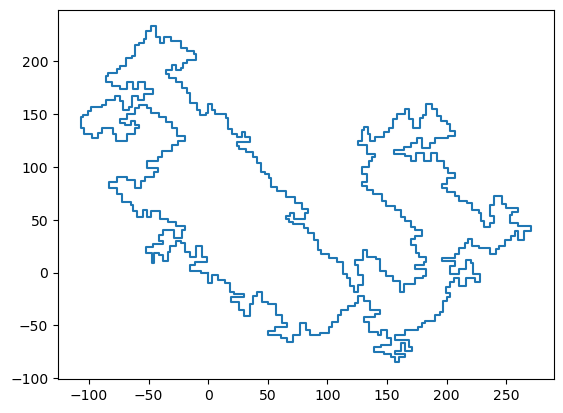

In [5]:
# loop through directions and adjust x,y coordinate based on number of steps and their direction

# init values
x_list = [0]
y_list = [0]
pos_x = 0
pos_y = 0
num_steps_idx = 0

# loop through the direction list and adjusting the x,y coordinate based on the direction and number of steps
for i in direction:
    if i == 'R':
        pos_x += steps[num_steps_idx]
    elif i == 'L':
        pos_x -= steps[num_steps_idx]
    elif i == 'U':
        pos_y += steps[num_steps_idx]
    elif i == 'D':
        pos_y -= steps[num_steps_idx]
    # append the x,y coordinate for each iteration
    x_list.append(pos_x)
    y_list.append(pos_y)
    num_steps_idx += 1
    print(pos_x, pos_y)

# visualize the results
plt.plot(x_list, y_list)

In [9]:
# find max and min x,y values 
print('X:',max(x_list),min(x_list))
print('Y:',max(y_list),min(y_list))

X: 271 -107
Y: 233 -85


X: 378 0
Y: 318 0


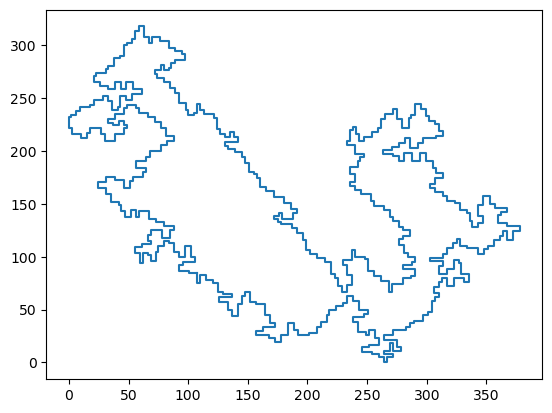

In [10]:
# push x,y values up so all values are positive; helps with filling in the hole
x_list_zeroed = [x+107 for x in x_list]
y_list_zeroed = [y+85 for y in y_list]
print('X:',max(x_list_zeroed),min(x_list_zeroed))
print('Y:',max(y_list_zeroed),min(y_list_zeroed))

# another chart to make sure zeroing was successful
plt.plot(x_list_zeroed, y_list_zeroed)

In [135]:
# empty list of lists of 0s
map = [[0] * (max(y_list_zeroed)+1) for _ in range(max(x_list_zeroed)+1)]
# how to call x,y points in list of lists: map[5][200]    x=5, y=200

In [136]:
# loop through values of x
for x in x_list_zeroed:
    # find the indices where the x is found
    y_idxs = [i for i, j in enumerate(x_list_zeroed) if j == x]
    # find the value of y for the index found above
    y_coor = [y_list_zeroed[i] for i in y_idxs]
    #loop through the 
    for k in y_coor:
        map[x][k] = 1

In [137]:
# nested loop through map which should 'fill in' the map
# 1 will represent the edges and 2 will be the inside; this allows us to stop on the outer edges before we fill outside the perimeter
for i in range(len(map)):
    for j in range(len(map[i])-1):
        # detects an edge and fills in the next location if it is currently empty
        if map[i][j] == 1 and map[i][j+1] == 0:
            #fills in the next location
            map[i][j+1] = 2
        # continues the filling process on inside locations
        if map[i][j] == 2 and map[i][j+1] == 0:
            map[i][j+1] = 2


In [138]:
counter1 = 0
counter2 = 0
for i in map:
    counter1 += i.count(1)
    counter2 += i.count(2)
print(counter1, counter2)

716 41560
